In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns
#import folium 
import requests

1. Poprawne załadowanie danych ze źródła internetowego do ramki danych, z uwzględnieniem 
nagłówków, kodowania zbioru, separatorów itd.

In [113]:
airbnb=pd.read_csv("listings.csv")

2. Poznanie rozmiaru zbioru danych (liczby obserwacji i liczby zmiennych, które je opisują)
i oszacowanie czasochłonności procesu analizy

In [114]:
airbnb.count()

id                                              5597
listing_url                                     5597
scrape_id                                       5597
last_scraped                                    5597
name                                            5597
                                                ... 
calculated_host_listings_count                  5597
calculated_host_listings_count_entire_homes     5597
calculated_host_listings_count_private_rooms    5597
calculated_host_listings_count_shared_rooms     5597
reviews_per_month                               5070
Length: 74, dtype: int64

In [115]:
airbnb.shape

(5597, 74)

In [116]:
airbnb.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

In [195]:
columns = ['id', 'name',
       'host_is_superhost', 
       'host_has_profile_pic', 'host_identity_verified', 
       'neighbourhood_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type','accommodates','bathrooms','bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights','has_availability', 'number_of_reviews',
       'review_scores_cleanliness', 'license', 'instant_bookable','calculated_host_listings_count', 'reviews_per_month']

In [196]:
data_columns = airbnb[columns]
print(data_columns.shape)

(5597, 25)


3. Wyświetlenie próbki surowych danych w celu wyrobienia sobie wyobrażenia o nich – poznania
struktury danych i wstępnej oceny przydatności poszczególnych zmiennych;

In [197]:
pd.set_option('display.max_columns', None)
data_columns.head(5)

,id,name,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,has_availability,number_of_reviews,review_scores_cleanliness,license,instant_bookable,calculated_host_listings_count,reviews_per_month
0,2818,Quiet Garden View Room & Super Fast WiFi,t,t,t,Oostelijk Havengebied - Indische Buurt,52.36435,4.94358,Private room in rental unit,Private room,2,NaN,1.0,2.0,"[""Security cameras on property"", ""Refrigerator...",$59.00,3,28,t,285,5.00,0363 5F3A 5684 6750 D14D,t,1,1.83
1,20168,Studio with private bathroom in the centre 1,f,t,t,Centrum-Oost,52.36407,4.89393,Private room in townhouse,Private room,2,NaN,1.0,1.0,"[""Fire extinguisher"", ""Carbon monoxide alarm"",...",$106.00,1,365,t,339,4.79,0363 CBB3 2C10 0C2A 1E29,t,2,2.35
2,27886,"Romantic, stylish B&B houseboat in canal district",t,t,t,Centrum-West,52.38761,4.89188,Private room in houseboat,Private room,2,NaN,1.0,1.0,"[""Nespresso machine"", ""Dishes and silverware"",...",$135.00,2,730,t,227,4.96,0363 974D 4986 7411 88D8,t,1,1.87
3,28871,Comfortable double room,t,t,t,Centrum-West,52.36775,4.89092,Private room in rental unit,Private room,2,NaN,1.0,1.0,"[""Fire extinguisher"", ""Lock on bedroom door"", ...",$75.00,2,1825,t,372,4.89,0363 607B EA74 0BD8 2F6F,f,2,2.69
4,29051,Comfortable single room,t,t,t,Centrum-Oost,52.36584,4.89111,Private room in rental unit,Private room,1,NaN,1.0,1.0,"[""Fire extinguisher"", ""Lock on bedroom door"", ...",$55.00,2,730,t,525,4.83,0363 607B EA74 0BD8 2F6F,f,2,3.99


4. Weryfikacja typów poszczególnych zmiennych (całkowite, zmiennoprzecinkowe, kategoryczne porządkowe, kategoryczne nominalne, zmienne typu logicznego, daty) i ich ewentualna korekta (zamiana typu string na float, interpretacja zmiennych numerycznych jako kategorii itp.);

In [198]:
data_columns.dtypes

id                                  int64
name                               object
host_is_superhost                  object
host_has_profile_pic               object
host_identity_verified             object
neighbourhood_cleansed             object
latitude                          float64
longitude                         float64
property_type                      object
room_type                          object
accommodates                        int64
bathrooms                         float64
bedrooms                          float64
beds                              float64
amenities                          object
price                              object
minimum_nights                      int64
maximum_nights                      int64
has_availability                   object
number_of_reviews                   int64
review_scores_cleanliness         float64
license                            object
instant_bookable                   object
calculated_host_listings_count    

5. Zbudowanie podsumowania zmiennych numerycznych opisujących zbiór, w postaci jednej tabelki, zawierającej podstawowe informacje

In [199]:
data_columns.describe(include='all')

,id,name,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,has_availability,number_of_reviews,review_scores_cleanliness,license,instant_bookable,calculated_host_listings_count,reviews_per_month
count,5.597000e+03,5597,5597,5597,5597,5597,5597.000000,5597.000000,5597,5597,5597.000000,0.0,5283.000000,5496.000000,5597,5597,5597.000000,5597.000000,5597,5597.000000,5061.000000,5562,5597,5597.000000,5070.000000
unique,NaN,5527,2,2,2,22,NaN,NaN,58,4,NaN,NaN,NaN,NaN,5377,450,NaN,NaN,2,NaN,NaN,4444,2,NaN,NaN
top,NaN,Residences | 2-Bedrooms | Serviced Apartment,f,t,t,Centrum-West,NaN,NaN,Entire rental unit,Entire home/apt,NaN,NaN,NaN,NaN,"[""Long term stays allowed"", ""Wifi"", ""Heating"",...",$150.00,NaN,NaN,t,NaN,NaN,Exempt,f,NaN,NaN
freq,NaN,13,4173,5581,4539,885,NaN,NaN,2363,3739,NaN,NaN,NaN,NaN,9,248,NaN,NaN,5581,NaN,NaN,703,3773,NaN,NaN
mean,2.610938e+07,NaN,NaN,NaN,NaN,NaN,52.367185,4.891459,NaN,NaN,2.942827,NaN,1.568995,1.951055,NaN,NaN,3.397892,535.597106,NaN,49.141326,4.751472,NaN,NaN,2.162051,1.144730
std,1.685008e+07,NaN,NaN,NaN,NaN,NaN,0.016925,0.035979,NaN,NaN,1.444945,NaN,0.915970,1.639583,NaN,NaN,14.884022,524.450436,NaN,89.732896,0.324724,NaN,NaN,3.038060,2.184577
min,2.818000e+03,NaN,NaN,NaN,NaN,NaN,52.290340,4.755710,NaN,NaN,0.000000,NaN,1.000000,1.000000,NaN,NaN,1.000000,1.000000,NaN,0.000000,1.000000,NaN,NaN,1.000000,0.010000
25%,1.156314e+07,NaN,NaN,NaN,NaN,NaN,52.356670,4.869590,NaN,NaN,2.000000,NaN,1.000000,1.000000,NaN,NaN,2.000000,28.000000,NaN,4.000000,4.660000,NaN,NaN,1.000000,0.260000
50%,2.473348e+07,NaN,NaN,NaN,NaN,NaN,52.366720,4.888650,NaN,NaN,2.000000,NaN,1.000000,1.000000,NaN,NaN,2.000000,365.000000,NaN,17.000000,4.850000,NaN,NaN,1.000000,0.540000
75%,4.120450e+07,NaN,NaN,NaN,NaN,NaN,52.376730,4.908420,NaN,NaN,4.000000,NaN,2.000000,2.000000,NaN,NaN,3.000000,1125.000000,NaN,47.000000,4.970000,NaN,NaN,2.000000,1.250000


In [200]:
data_columns.describe(include='object')

,name,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,property_type,room_type,amenities,price,has_availability,license,instant_bookable
count,5597,5597,5597,5597,5597,5597,5597,5597,5597,5597,5562,5597
unique,5527,2,2,2,22,58,4,5377,450,2,4444,2
top,Residences | 2-Bedrooms | Serviced Apartment,f,t,t,Centrum-West,Entire rental unit,Entire home/apt,"[""Long term stays allowed"", ""Wifi"", ""Heating"",...",$150.00,t,Exempt,f
freq,13,4173,5581,4539,885,2363,3739,9,248,5581,703,3773


In [201]:
# h. liczba danych brakujących lub nienumerycznych.
#sprawdzenie 0 
data_columns.isnull().sum()

id                                   0
name                                 0
host_is_superhost                    0
host_has_profile_pic                 0
host_identity_verified               0
neighbourhood_cleansed               0
latitude                             0
longitude                            0
property_type                        0
room_type                            0
accommodates                         0
bathrooms                         5597
bedrooms                           314
beds                               101
amenities                            0
price                                0
minimum_nights                       0
maximum_nights                       0
has_availability                     0
number_of_reviews                    0
review_scores_cleanliness          536
license                             35
instant_bookable                     0
calculated_host_listings_count       0
reviews_per_month                  527
dtype: int64

In [202]:
data_columns['bathrooms'].fillna(0, inplace=True)
data_columns['bedrooms'].fillna(0, inplace=True)
data_columns['beds'].fillna(0, inplace=True)
data_columns['review_scores_cleanliness'].fillna(0, inplace=True)
data_columns['license'].fillna(0, inplace=True)
data_columns['reviews_per_month'].fillna(0, inplace=True)

C:\Users\Natalia\anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [203]:
data_columns.isnull().sum()

id                                0
name                              0
host_is_superhost                 0
host_has_profile_pic              0
host_identity_verified            0
neighbourhood_cleansed            0
latitude                          0
longitude                         0
property_type                     0
room_type                         0
accommodates                      0
bathrooms                         0
bedrooms                          0
beds                              0
amenities                         0
price                             0
minimum_nights                    0
maximum_nights                    0
has_availability                  0
number_of_reviews                 0
review_scores_cleanliness         0
license                           0
instant_bookable                  0
calculated_host_listings_count    0
reviews_per_month                 0
dtype: int64

In [204]:
data_columns = data_columns.copy()
data_columns['price'].apply(type)

0       <class 'str'>
1       <class 'str'>
2       <class 'str'>
3       <class 'str'>
4       <class 'str'>
            ...      
5592    <class 'str'>
5593    <class 'str'>
5594    <class 'str'>
5595    <class 'str'>
5596    <class 'str'>
Name: price, Length: 5597, dtype: object

6. Sprawdzenie, czy w zbiorze występują braki danych. Należy sporządzić odrębne podsumowanie,
skupiając się na poszukiwaniu brakujących wartości w zbiorze – Pozwoli to Państwu odpowiedzieć
na pytanie, jakie zmienne zawierają braki i jaka jest ich liczba, z czego mogą one wynikać itd.

In [205]:
nulls_summary = pd.DataFrame(data_columns.isnull().any(), columns=['Nulls'])
nulls_summary['Num_of_nulls [qty]'] = pd.DataFrame(data_columns.isnull().sum())
nulls_summary['Num_of_nulls [%]'] = round((data_columns.isnull().mean()*100),2)
print(nulls_summary)

                                Nulls  Num_of_nulls [qty]  Num_of_nulls [%]
id                              False                   0               0.0
name                            False                   0               0.0
host_is_superhost               False                   0               0.0
host_has_profile_pic            False                   0               0.0
host_identity_verified          False                   0               0.0
neighbourhood_cleansed          False                   0               0.0
latitude                        False                   0               0.0
longitude                       False                   0               0.0
property_type                   False                   0               0.0
room_type                       False                   0               0.0
accommodates                    False                   0               0.0
bathrooms                       False                   0               0.0
bedrooms    

In [206]:
data_columns_clean = data_columns.dropna()

In [207]:
nulls_summary = pd.DataFrame(data_columns.isnull().any(), columns=['Nulls'])
nulls_summary['Num_of_nulls [qty]'] = pd.DataFrame(data_columns.isnull().sum())
nulls_summary['Num_of_nulls [%]'] = round((data_columns.isnull().mean()*100),2)
print(nulls_summary)

                                Nulls  Num_of_nulls [qty]  Num_of_nulls [%]
id                              False                   0               0.0
name                            False                   0               0.0
host_is_superhost               False                   0               0.0
host_has_profile_pic            False                   0               0.0
host_identity_verified          False                   0               0.0
neighbourhood_cleansed          False                   0               0.0
latitude                        False                   0               0.0
longitude                       False                   0               0.0
property_type                   False                   0               0.0
room_type                       False                   0               0.0
accommodates                    False                   0               0.0
bathrooms                       False                   0               0.0
bedrooms    

In [208]:
data_columns.price = data_columns.price.apply(lambda x: x.replace("$", ""))
data_columns.price = data_columns.price.apply(lambda x: x.replace(",", ""))
data_columns.price.describe()

count       5597
unique       450
top       150.00
freq         248
Name: price, dtype: object

7. Wizualizacja rozkładu (wybranych) zmiennych (zarówno numerycznych, jak i kategorycznych)
poprzez histogramy i próba ich scharakteryzowania (np. poprzez ich skośność i kurtozę) – będzie to
pomocne np. w procesie imputacji (uzupełniania) zmiennych numerycznych;

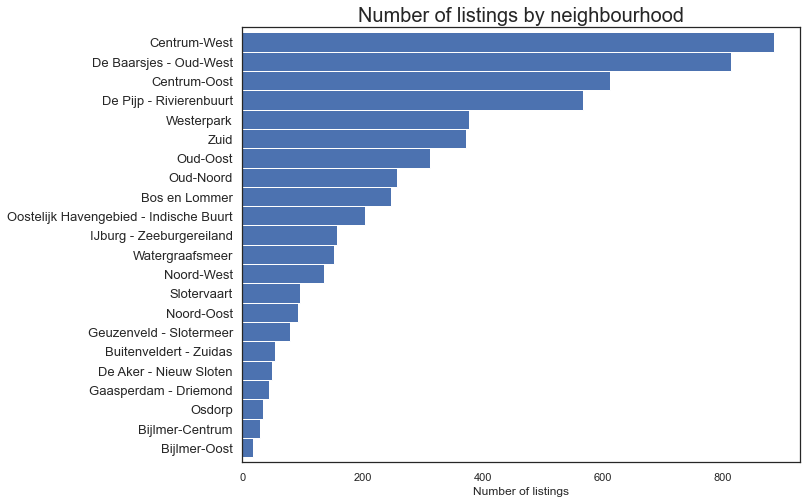

In [209]:
#w jakich dzielnicach jest najwięcej ofert - w Amsterdamie jest to oczywiście Centrum-West 
feq=data_columns['neighbourhood_cleansed'].value_counts().sort_values(ascending=True)
feq.plot.barh(figsize=(10, 8), color='b', width=1)
plt.title("Number of listings by neighbourhood", fontsize=20)
plt.xlabel('Number of listings', fontsize=12)
plt.show()

In [211]:
#dodatkowe typy wynajomwanych pomieszczeń
data_columns.property_type.unique()

array(['Private room in rental unit', 'Private room in townhouse',
       'Private room in houseboat', 'Entire rental unit',
       'Entire guest suite', 'Boat', 'Private room in bed and breakfast',
       'Entire loft', 'Private room in residential home',
       'Private room in loft', 'Entire guesthouse',
       'Private room in boat', 'Private room in guest suite',
       'Entire townhouse', 'Room in boutique hotel',
       'Entire condominium (condo)', 'Entire residential home',
       'Entire serviced apartment', 'Private room in farm stay',
       'Houseboat', 'Room in bed and breakfast', 'Entire chalet',
       'Private room in guesthouse', 'Shared room in rental unit',
       'Private room in condominium (condo)',
       'Shared room in residential home', 'Private room in island',
       'Entire villa', 'Private room in tiny house',
       'Private room in villa', 'Barn', 'Private room in bungalow',
       'Entire cabin', 'Room in hotel', 'Entire place',
       'Room in apartho

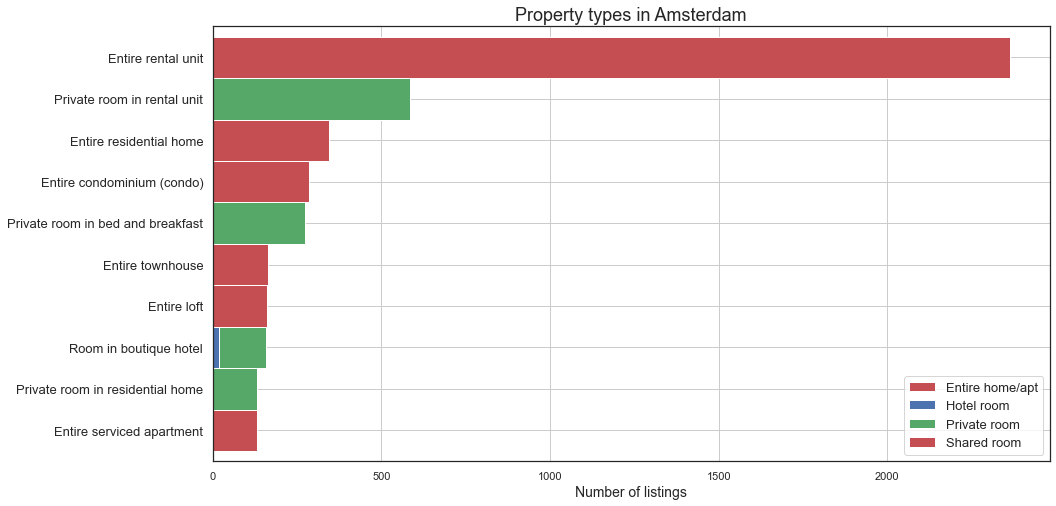

In [212]:
#wykres pokazujący jakie typy lokali można wynająć, w Amsterdamie dominują całe lokale, zaraz za nimi prywatne pokoje w mieszkaniach
prop = data_columns.groupby(['property_type','room_type']).room_type.count()
prop = prop.unstack()
prop['total'] = prop.iloc[:,0:3].sum(axis = 1)
prop = prop.sort_values(by=['total'])
prop = prop[prop['total']>=100]
prop = prop.drop(columns=['total'])

prop.plot(kind='barh',stacked=True, color = ["r","b","g"],
              linewidth = 1, grid=True, figsize=(15,8), width=1)
plt.title('Property types in Amsterdam', fontsize=18)
plt.xlabel('Number of listings', fontsize=14)
plt.ylabel("")
plt.legend(loc = 4,prop = {"size" : 13})
plt.rc('ytick', labelsize=13)
plt.show()

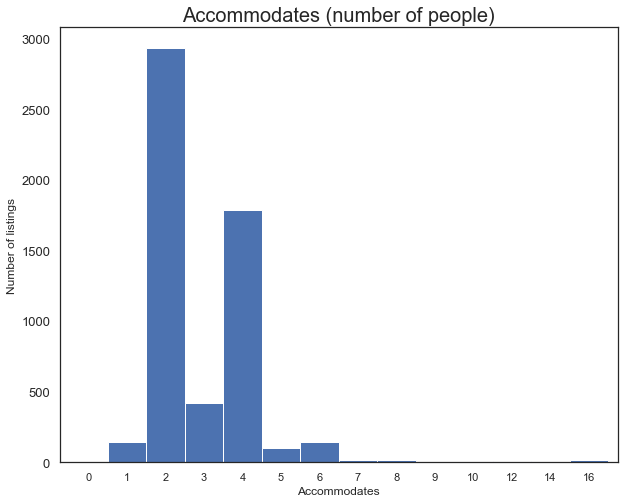

In [213]:
#rozkład ilości ofert do oferowanych w nich ilości pokojów - w Amsterdami przeważają 2 oraz 4 - pokojowe lokale
feq=data_columns['accommodates'].value_counts().sort_index()
feq.plot.bar(figsize=(10, 8), color='b', width=1, rot=0)
plt.title("Accommodates (number of people)", fontsize=20)
plt.ylabel('Number of listings', fontsize=12)
plt.xlabel('Accommodates', fontsize=12)
plt.show()

In [220]:
data_columns['price'] = data_columns['price'].apply(lambda x:x.lstrip('$'))
data_columns['price'] = data_columns['price'].apply(lambda x:x.replace(',',''))
data_columns['price'] = data_columns['price'].astype('float64')

In [221]:
#wstęp do analizy cen
from scipy import stats
from scipy.stats import norm
import matplotlib.pyplot as plt

def check_dist(price):
    print('Checking the statistical distribution of prices')
    print(price.describe())
    
    print('Fitting the prices into normal distribution')
    sns.distplot(price, fit=norm)

    # Get the fitted parameters used by the function
    (mu, sigma) = norm.fit(price)
    print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

    #Now plot the distribution
    plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
                loc='best')
    plt.ylabel('Frequency')
    plt.title('Price distribution')

    #Get also the QQ-plot
    fig = plt.figure()
    res = stats.probplot(price, plot=plt)
    plt.show()

Checking the statistical distribution of prices
count    5597.000000
mean      163.928712
std       162.113721
min         0.000000
25%        95.000000
50%       135.000000
75%       198.000000
max      6477.000000
Name: price, dtype: float64
Fitting the prices into normal distribution

 mu = 163.93 and sigma = 162.10



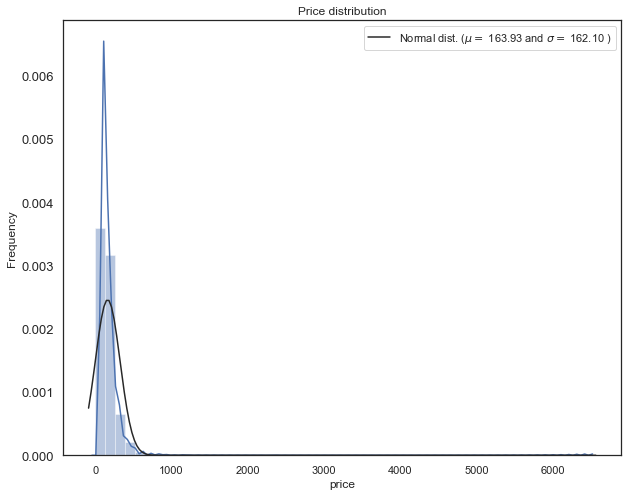

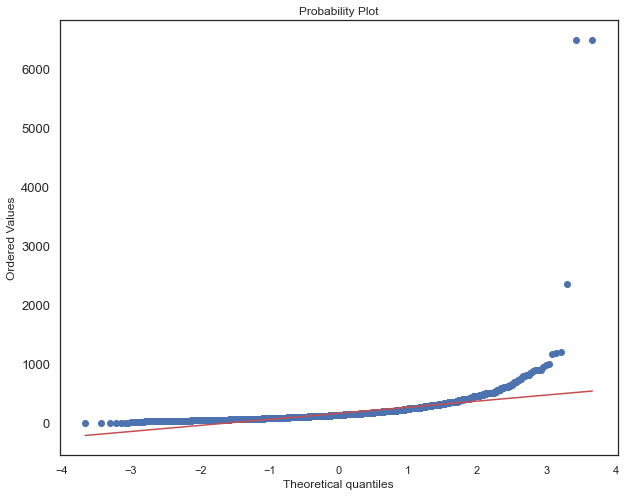

In [222]:
check_dist(data_columns['price'])

In [247]:
features = data_columns[data_columns['price']<200]

In [248]:
#pokazanie jak rozkładają się ceny w rozkładzie normalnym poniżej 200 usd
def correct_dist(price):
    price = np.log1p(price)

    #Check the new distribution 
    sns.distplot(price , fit=norm);

    # Get the fitted parameters used by the function
    (mu, sigma) = norm.fit(price)
    print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

    #Now plot the distribution
    plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
                loc='best')
    plt.ylabel('Frequency')
    plt.title('Price distribution')

    #Get also the QQ-plot
    fig = plt.figure()
    res = stats.probplot(price, plot=plt)
    plt.show()
    return price


 mu = 4.69 and sigma = 0.44



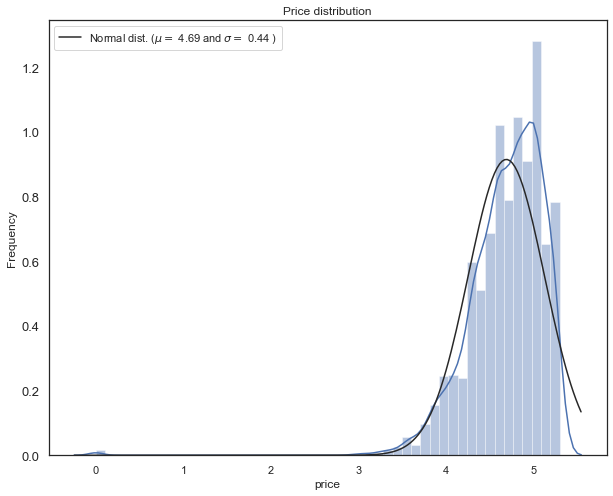

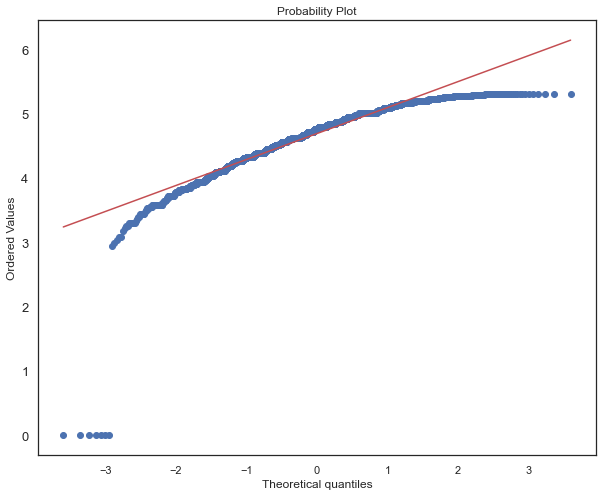

<ipython-input-249-d99433f3194e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['corrected_price'] = correct_dist(features['price'])


In [249]:
features['corrected_price'] = correct_dist(features['price'])

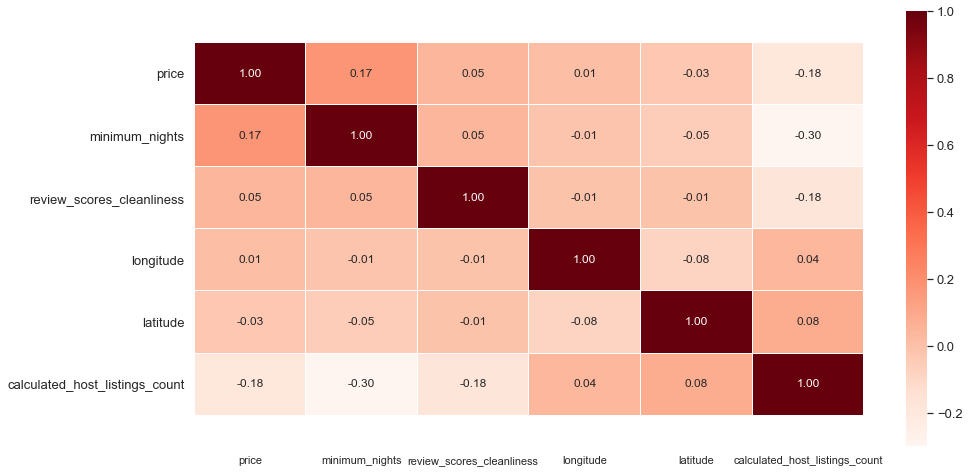

In [236]:
#korelacja spearmana pomiędzy najważniejszymi zmiennymi - cena jest najwyżej skorelowana z minimalną ilością zarezerwowanych nocy oraz opinią czystości
top = 8
corr = data_columns[['latitude', 'longitude', 'price', 'minimum_nights','review_scores_cleanliness', 'calculated_host_listings_count','neighbourhood_cleansed', 'room_type']].corr(method='spearman')
top8 = abs(corr.nlargest(top,'price')['price']).index
corr_top8 = data_columns[top8].corr(method='spearman')
plt.figure(figsize=(15,8))
ax = sns.heatmap(corr_top8, annot=True, linewidths=0.1, fmt='.2f', cmap='Reds', annot_kws={'size':12})
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.savefig('corr.png')

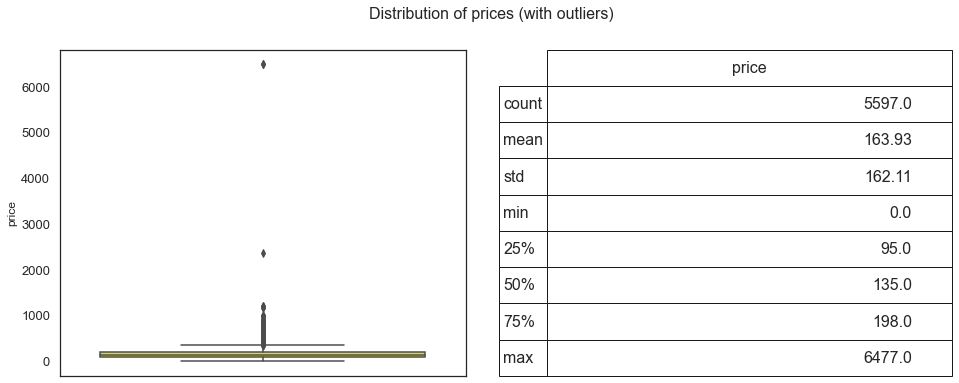

In [237]:
#rozkład ceny oraz jej analiza statystyczna, średnia cena najmu w Amsterdamie to 163.93 usd, maksymalna natomiast 6477 usd (jest to wartość odstająca więc może być ona za np, noc na łodzi)
fig = plt.figure(figsize=(16,6))

ax1 = fig.add_subplot(121)
# ax1.boxplot(data['price'])
sns.boxplot(y = data_columns['price'], ax=ax1, color='yellow')
describe = data_columns['price'].describe().to_frame().round(2)

ax2 = fig.add_subplot(122)
ax2.axis('off')
font_size = 16
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of prices (with outliers)', fontsize=16)
plt.show()

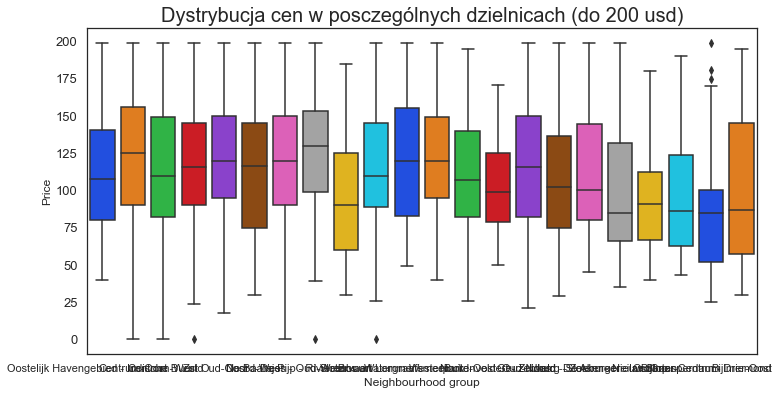

In [246]:
#skrzynka wąsy pokazuje rozkład ceny w poszczególnych dzielnicach
plt.figure(figsize=(12,6))
sns.boxplot(data=data_columns[data_columns.price <200], x='neighbourhood_cleansed', y='price', palette='bright')
plt.title('Dystrybucja cen w posczególnych dzielnicach (do 200 usd)', fontsize=20)
plt.xlabel('Neighbourhood group')
plt.ylabel("Price")
plt.show()

Najbardziej obleganymi dzielnicami w Amsterdamie są okolice centrum tj. Centrum-West oraz Centrum-Oost. Można tam znaleźć nie tylko klasyczne mieszkania czy pokoje ale także łodzie, które dodają unikalnej wartości, jako że Amsterdam jest miastem tysiąca kanałów. Najczęściej obleganymi typami wynajmowanych lokali są oczywiście całe mieszkania (prawie 3000 ofert). Można także znaleźć prywatne pokoje (ponad 500) czy całe domu (ponad 250). Przeważają oferty skierowane do dwóch wynajmujących osób, maksymalnie 4 - wynikać to może z restrykcji miasta co do ilości mieszkańców na jedno mieszkanie. 
Cena najmu w Amsterdamie jest najwyżej skolerowana z minimalną ilością nocy (może to wynikać z tego, że rozkładają się koszty sprzątania i opieki nad mieszkaniem) oraz ocenami czystości danego lokalu - wynajmujący cenią sobię ten komfort. Średnia cena lokalu to 163,93 USD, natomiast maksymalna to 6477 USD, która jest wartością odstającą. 